In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import nltk
from nltk.tokenize import word_tokenize
from pytwitter import Api
import json
import math

#!pip install emoji
from emoji import UNICODE_EMOJI

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#API key = 
#API key secret 
#bearer token 
#Access token 
#Acces token secret 

In [2]:

file1 = open('#vleestaks.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file1.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line,encoding="utf-8"))
    
data = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        if tweets[i]["data"][0]["lang"] == 'nl':
            temp.append(tweets[i]["data"][0])
            user = [k for k in tweets[0]["includes"]["users"] 
                    if k["id"] == tweets[i]["data"][j]["author_id"]]
            temp.append(user)
            data.append(temp)
len(data)

10542

In [9]:
import time 
#text = data2[x][0]["text"]

features = []
for x in range(0,len(data)):
    temp = []
    if data[x][1] != []:
        followers_count = data[x][1][0]["public_metrics"]["followers_count"]
        temp.append(followers_count)
    else:
        temp.append(-1)

    tweetcount = -1 
    if data[x][1] != []:        
        tweetcount = data[x][1][0]["public_metrics"]["tweet_count"]
        temp.append(tweetcount)
    else:
        temp.append(-1)

    qmarks = "?" in data[x][0]["text"]
    temp.append(int(qmarks))

    if data[x][1] != []:
        verified = data[x][1][0]["verified"]
        temp.append(int(verified))    
    else:
        temp.append(-1)
        
    accountlife = time.mktime(time.localtime()) - time.mktime(time.strptime(data[x][0]["created_at"], "%Y-%m-%dT%H:%M:%S.000Z"))
    temp.append(accountlife)

    if data[x][1] != []:    
        ratio = (data[x][1][0]["public_metrics"]["followers_count"]+1)/(data[x][1][0]["public_metrics"]["following_count"]+2)
        temp.append(ratio)
    else:
        temp.append(999999)
        
    emark = "!" in data[x][0]["text"]
    temp.append(int(emark))

    capitalletters = sum(1 for c in data[x][0]["text"] if c.isupper())/sum(1 for c in data[x][0])
    temp.append(capitalletters)

    retweet_count = data[x][0]["public_metrics"]["retweet_count"]
    temp.append(retweet_count)
    
    hashtags = "#" in data[x][0]["text"]
    temp.append(int(hashtags))
    
    if data[x][1] != []:
        following = data[x][1][0]["public_metrics"]["following_count"]
        temp.append(following)
    else:
        temp.append(-1)

    text_length = len(data[x][0]["text"])
    temp.append(text_length)
    
    if data[x][1] != []:    
        listed_count = data[x][1][0]["public_metrics"]["listed_count"]
        temp.append(listed_count)
    else:
        temp.append(-1)

    emoticons = True in [s in UNICODE_EMOJI['en'] for s in data[x][0]["text"]]
    temp.append(int(emoticons))
    
    reply_count = data[x][0]["public_metrics"]["reply_count"]
    temp.append(reply_count)
    
    quote_count = data[x][0]["public_metrics"]["quote_count"]
    temp.append(quote_count)
    
    like_count = data[x][0]["public_metrics"]["like_count"]
    temp.append(like_count)
    
    if data[x][1] != []:
        timeafterposting = time.mktime(time.strptime(data[x][1][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z")) - time.mktime(time.strptime(data[x][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z"))
        temp.append(timeafterposting)
    else:
        temp.append(999999)

    pos_tags = nltk.pos_tag(nltk.word_tokenize(data[x][0]["text"]))
    temp.append(pos_tags)
    
    activity = tweetcount/accountlife
    temp.append(activity)

    if data[x][1] != []:
        has_url = "profile_image_url" in data[x][1][0]
        temp.append(int(has_url))
    else:
        temp.append(-1)
        
    fpp = True in [i in data[x][0]["text"].lower() for i in ["me", "my", "i", "mine"]]
    temp.append(int(fpp))

    nsfw = data[x][0]["possibly_sensitive"] 
    temp.append(int(nsfw))
    features.append(temp)

In [10]:
[type(x) for x in features[0]]

[int,
 int,
 int,
 int,
 float,
 float,
 int,
 float,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 float,
 list,
 float,
 int,
 int,
 int]

Text(0, 0.5, 'frequency')

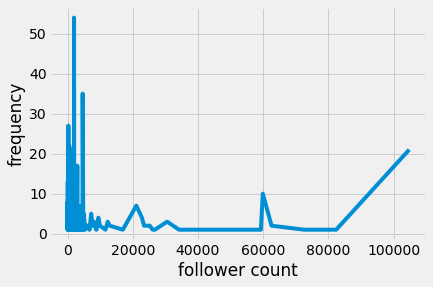

In [11]:
plt.style.use("fivethirtyeight")
unique, counts = np.unique([x[0] for x in features], return_counts=True)
plt.plot(unique[1:-1], counts[1:-1])
plt.xlabel("follower count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

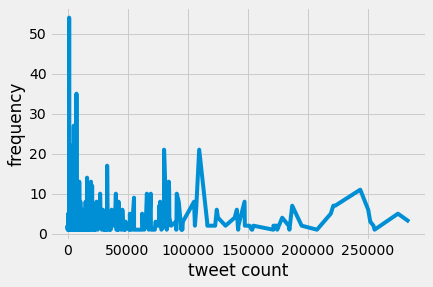

In [12]:
unique, counts = np.unique([x[1] for x in features], return_counts=True)
plt.plot(unique[1:-7], counts[1:-7])
plt.xlabel("tweet count")
plt.ylabel("frequency")

In [13]:
unique, counts = np.unique([x[2] for x in features], return_counts=True)
counts
#qmarks

array([9955,  587], dtype=int64)

In [14]:
unique, counts = np.unique([x[3] for x in features], return_counts=True)
counts

#verified 


array([9143, 1385,   14], dtype=int64)

In [15]:
unique

array([-1,  0,  1])

Text(0, 0.5, 'frequency')

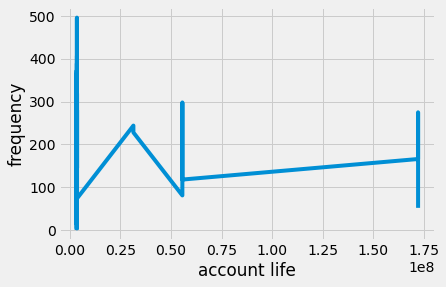

In [16]:
unique, counts = np.unique([x[4] for x in features], return_counts=True)
plt.plot(unique[:-1], counts[:-1])
plt.xlabel("account life")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

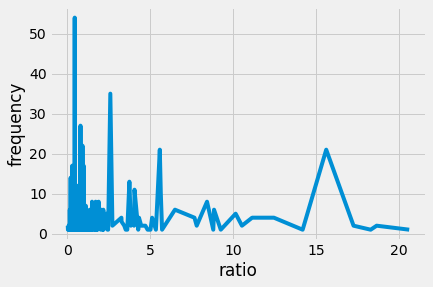

In [17]:
unique, counts = np.unique([x[5] for x in features], return_counts=True)
plt.plot(unique[:-10], counts[:-10])
plt.xlabel("ratio")
plt.ylabel("frequency")

In [18]:
unique, counts = np.unique([x[6] for x in features], return_counts=True)
counts

#exclamation points 

array([10070,   472], dtype=int64)

Text(0, 0.5, 'frequency')

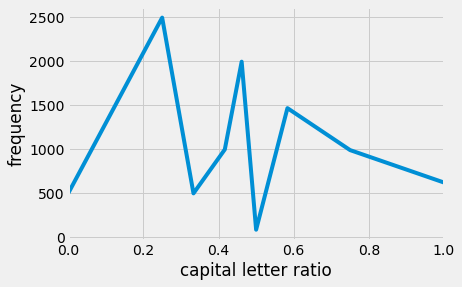

In [19]:
unique, counts = np.unique([x[7] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("capital letter ratio")
plt.xlim(0,1)
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

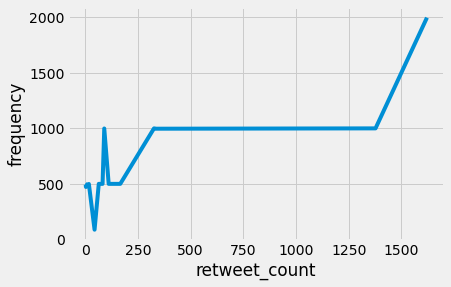

In [20]:
unique, counts = np.unique([x[8] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("retweet_count")
plt.ylabel("frequency")

In [21]:
unique, counts = np.unique([x[9] for x in features], return_counts=True)
counts

#hashtags

array([3996, 6546], dtype=int64)

Text(0, 0.5, 'frequency')

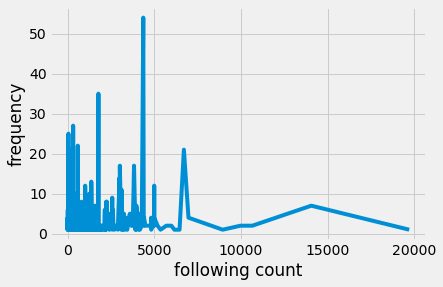

In [22]:
unique, counts = np.unique([x[10] for x in features], return_counts=True)
plt.plot(unique[1:], counts[1:])
plt.xlabel("following count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

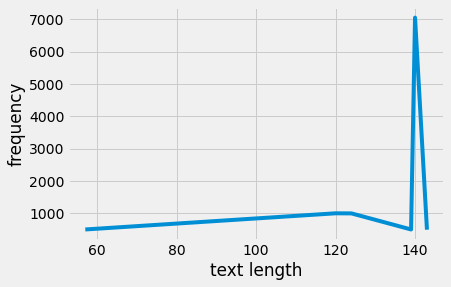

In [23]:
unique, counts = np.unique([x[11] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("text length")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

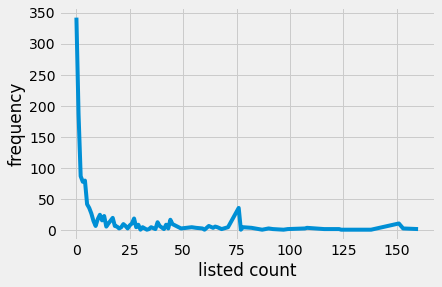

In [24]:
unique, counts = np.unique([x[12] for x in features], return_counts=True)
plt.plot(unique[1:-20], counts[1:-20])
plt.xlabel("listed count")
plt.ylabel("frequency")

In [25]:
unique, counts = np.unique([x[13] for x in features], return_counts=True)
print(unique)
print(counts)

#emoticons

[0 1]
[9545  997]


In [26]:
unique

array([0, 1])

In [27]:
unique, counts = np.unique([x[14] for x in features], return_counts=True)
print(unique)
print(counts)
#plt.plot(unique, counts)
# plt.xlabel("reply count")
# plt.ylabel("frequency")

[0]
[10542]


In [28]:
unique, counts = np.unique([x[15] for x in features], return_counts=True)
print(counts)
print(unique)
#quote count 

[10542]
[0]


In [29]:
unique, counts = np.unique([x[16] for x in features], return_counts=True)
print(unique)
print(counts)
# plt.plot(unique, counts)
# plt.xlabel("like count")
# plt.ylabel("frequency")


[0 1]
[10042   500]


Text(0, 0.5, 'frequency')

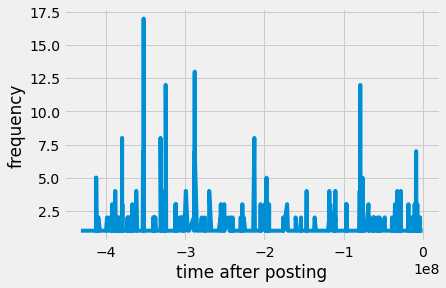

In [30]:
unique, counts = np.unique([x[17] for x in features], return_counts=True)
counts

plt.plot(unique[:-1], counts[:-1])
plt.xlabel("time after posting")
plt.ylabel("frequency")

#time after posting 



In [31]:
unique, counts = np.unique([x[18] for x in features], return_counts=True)
counts

#pos tags

C:\Users\nickv\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


array([ 500,  500,  497,  493,  500,   87,  499,  999,  500, 1000, 1998,
       1000,  997,  500,  472], dtype=int64)

Text(0, 0.5, 'frequency')

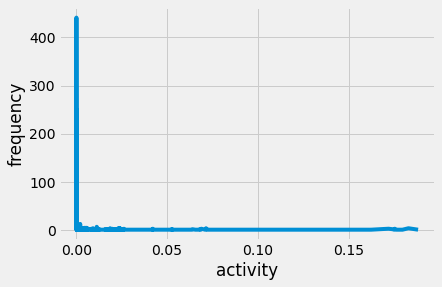

In [32]:
unique, counts = np.unique([x[19] for x in features], return_counts=True)
counts

plt.plot(unique[1:-1], counts[1:-1])
plt.xlabel("activity")
plt.ylabel("frequency")

In [33]:
unique, counts = np.unique([x[20] for x in features], return_counts=True)
counts

#has profile pic 

array([9143, 1399], dtype=int64)

In [34]:
unique, counts = np.unique([x[21] for x in features], return_counts=True)
print(unique)
print(counts)

#fpp

[1]
[10542]


In [35]:
unique, counts = np.unique([x[22] for x in features], return_counts=True)
counts

#possibly sensitive

array([10542], dtype=int64)

In [36]:
unique

array([0])

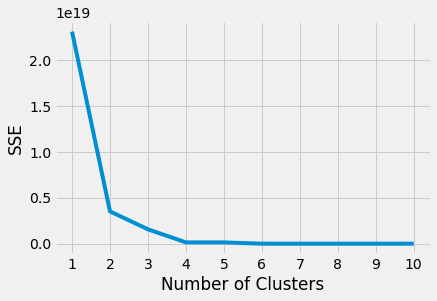

In [37]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs )
    kmeans.fit([x[0:17] for x in features])
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [38]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

scaled_features = [x[0:17] for x in features]

kmeans = KMeans(n_clusters=3, **kmeans_kwargs )
labels = kmeans.fit_predict(scaled_features)

In [39]:
np.count_nonzero(labels == 1)

9962

In [40]:
np.count_nonzero(labels == 2)

87

In [41]:
np.count_nonzero(labels == 0)

493

In [42]:
len(labels)

10542

Text(0, 0.5, 'Tweets')

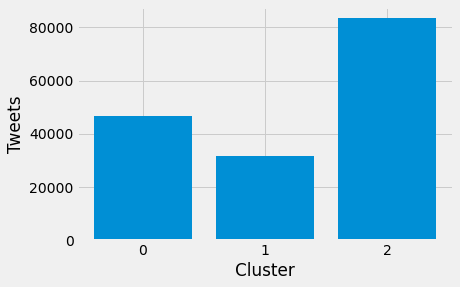

In [43]:
plt.style.use("fivethirtyeight")
plt.bar([0,1,2], [46534,31667,83432])
plt.xticks([0,1,2])
plt.xlabel("Cluster")
plt.ylabel("Tweets")

In [44]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

scaled_features = [x[0:17] for x in features]

kmeans = KMeans(n_clusters=2, **kmeans_kwargs )
labels = kmeans.fit_predict(scaled_features)


Text(0.5, 1.0, '#vleestaks')

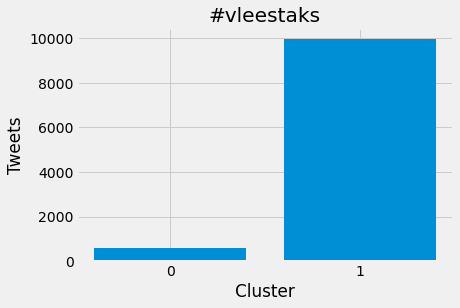

In [56]:
plt.style.use("fivethirtyeight")
zeros = np.count_nonzero(labels == 0)
ones = np.count_nonzero(labels == 1)
plt.bar([0,1], [zeros,ones])
plt.xticks([0,1])
plt.xlabel("Cluster")
plt.ylabel("Tweets")
plt.title("#vleestaks")

In [46]:
import html
import re
from nltk.stem import WordNetLemmatizer
def function_clean_tweet(text):
    # Escaping HTML characters
    text = html.unescape(text)
    text = str(text)
    # Removal of URLs (three-parter because the word tokenizer splits URLs like that)
    text = re.sub("https", "", text)
    text = re.sub(":", "", text)
    text = re.sub("//[^\s]*", "", text)
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Convert to lowercase
    text = text.lower()
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [47]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

tweet_texts = [x[0]["text"] for x in data]
 
stop_words = set(stopwords.words('dutch'))
stop_words.add("rt")
stop_words.add("vlees")
stop_words.add("vleestaks")

word_tokens = [word_tokenize(text, preserve_line=False) for text in tweet_texts]
 
filtered_sentences = [[w for w in tweet if not w.lower() in stop_words] for tweet in word_tokens]

all_words = [' '.join([x for x in f]) for f in filtered_sentences]
all_words = [function_clean_tweet([text]) for text in all_words]

count_vectorizer = CountVectorizer(stop_words=stop_words)
count_data = count_vectorizer.fit_transform(all_words)

lda = LDA(n_components=5, n_jobs=-1)
lda.fit(count_data)

print("Topics found via LDA:")
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
print_topics(lda, count_vectorizer, 20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nickv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topics found via LDA:

Topic #0:
gezondheid euro miljarden wassenbergfrank productie doorberekend klimaat betaald schade natuur vaker steed gebeuren detail aangeeft overheid kleinste huisvader gedraagt ongehoordnedtv

Topic #1:
jan vliegtaks jndkgrf briefje burgerhaat nieuw paternotte sneeuw zelensky klapvee tweedekamer zelenski verschrikkelijk oakentersagain pijnlijk we reacties woutel logisch zichtbaar

Topic #2:
minder overmars schuld allemaal dickpik mensen miljard dyanaloehr minstens miljoen maak ton jaar half gt per co2 duurder 40 dode

Topic #3:
waar regering on future ineens komt the europe waarvan conference panel arnowellens vandaan 52 tappcoalitie mensen vegetariersbond onze tekenden petitie

Topic #4:
lientje1967 tijd gaan rekeningen dak voedsel be energie prijzen benzine mensen even ministerlnv achterban fan vleesvervangers waar cda meerderheid nederlanders


In [48]:
import pyLDAvis
import sklearn
import pyLDAvis.sklearn
#help(pyLDAvis)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, count_data, count_vectorizer)

C:\Users\nickv\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.234780  0.063639       1        1  37.737440
0     -0.194253 -0.382679       2        1  20.063473
1     -0.342529  0.267546       3        1  19.631558
3      0.181265 -0.063648       4        1  11.452024
2      0.120736  0.115143       5        1  11.115505, topic_info=            Term         Freq        Total Category  logprob  loglift
54           jan  1966.000000  1966.000000  Default  30.0000  30.0000
60   lientje1967  2869.000000  2869.000000  Default  29.0000  29.0000
122    vliegtaks  1475.000000  1475.000000  Default  28.0000  28.0000
72        minder  1081.000000  1081.000000  Default  27.0000  27.0000
67        mensen  2968.000000  2968.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
60   lientje1967     0.219269  2869.798830   Topic5 -10.8599  -7.2826
3             52     0.219268   994.418692   Topic5 -10.8599  -6.2228
93       prijzen     0.219266  1912.903003   Topic5 -10.8599  -6.8770
20           dak     0.219266  1912.903003   Topic5 -10.8599  -6.8770
31       energie     0.219266  1912.903003   Topic5 -10.8599  -6.8770

[221 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         4  0.998305        000
1         5  0.999094         40
2         1  0.999013         44
3         1  0.480683         52
3         4  0.518896         52
...     ...       ...        ...
134       3  0.999054   zelensky
135       1  0.999013      zelfs
136       1  0.999013         zi
137       3  0.999085  zichtbaar
138       1  0.999013       ziet

[142 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3])

In [3]:
import time 
#text = data2[x][0]["text"]

features = []
for x in range(0,len(data)):
    temp = []
    if data[x][1] != []:
        followers_count = data[x][1][0]["public_metrics"]["followers_count"]
        temp.append(followers_count)
    else:
        temp.append(None)

    tweetcount = -1 
    if data[x][1] != []:        
        tweetcount = data[x][1][0]["public_metrics"]["tweet_count"]
        temp.append(tweetcount)
    else:
        temp.append(None)

    qmarks = "?" in data[x][0]["text"]
    temp.append(int(qmarks))

    if data[x][1] != []:
        verified = data[x][1][0]["verified"]
        temp.append(int(verified))    
    else:
        temp.append(None)
        
    accountlife = time.mktime(time.localtime()) - time.mktime(time.strptime(data[x][0]["created_at"], "%Y-%m-%dT%H:%M:%S.000Z"))
    temp.append(accountlife)

    if data[x][1] != []:    
        ratio = (data[x][1][0]["public_metrics"]["followers_count"]+1)/(data[x][1][0]["public_metrics"]["following_count"]+2)
        temp.append(ratio)
    else:
        temp.append(None)
        
    emark = "!" in data[x][0]["text"]
    temp.append(int(emark))

    capitalletters = sum(1 for c in data[x][0]["text"] if c.isupper())/sum(1 for c in data[x][0])
    temp.append(capitalletters)

    retweet_count = data[x][0]["public_metrics"]["retweet_count"]
    temp.append(retweet_count)
    
    hashtags = "#" in data[x][0]["text"]
    temp.append(int(hashtags))
    
    if data[x][1] != []:
        following = data[x][1][0]["public_metrics"]["following_count"]
        temp.append(following)
    else:
        temp.append(None)

    text_length = len(data[x][0]["text"])
    temp.append(text_length)
    
    if data[x][1] != []:    
        listed_count = data[x][1][0]["public_metrics"]["listed_count"]
        temp.append(listed_count)
    else:
        temp.append(None)

    emoticons = True in [s in UNICODE_EMOJI['en'] for s in data[x][0]["text"]]
    temp.append(int(emoticons))
    
    reply_count = data[x][0]["public_metrics"]["reply_count"]
    temp.append(reply_count)
    
    quote_count = data[x][0]["public_metrics"]["quote_count"]
    temp.append(quote_count)
    
    like_count = data[x][0]["public_metrics"]["like_count"]
    temp.append(like_count)
    
    if data[x][1] != []:
        timeafterposting = time.mktime(time.strptime(data[x][1][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z")) - time.mktime(time.strptime(data[x][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z"))
        temp.append(timeafterposting)
    else:
        temp.append(None)

    pos_tags = nltk.pos_tag(nltk.word_tokenize(data[x][0]["text"]))
    temp.append(pos_tags)
    
    activity = tweetcount/accountlife
    temp.append(activity)

    if data[x][1] != []:
        has_url = "profile_image_url" in data[x][1][0]
        temp.append(int(has_url))
    else:
        temp.append(None)
        
    fpp = True in [i in data[x][0]["text"].lower() for i in ["me", "my", "i", "mine"]]
    temp.append(int(fpp))

    nsfw = data[x][0]["possibly_sensitive"] 
    temp.append(int(nsfw))
    features.append(temp)

In [4]:
np.array(features, dtype=object).shape

columns = ["followers",
          "tweet_count",
          "question_marks",
          "verified",
          "accountlife",
          "followers_count",
          "exclamation_marks",
          "capital letters",
          "retweet_count",
          "hashtags",
          "following",
          "text length",
          "listed_count",
          "emoticons",
          "reply_count",
          "quote_count",
          "like_count",
          "time_after_posting",
          "pos_tags",
          "activity",
          "has_url",
          "has_first_person_pronouns",
          "possibly_sensitive"]
df = pd.DataFrame(data=features, index=None, columns=columns)

In [5]:
df

,followers,tweet_count,question_marks,verified,accountlife,followers_count,exclamation_marks,capital letters,retweet_count,hashtags,...,emoticons,reply_count,quote_count,like_count,time_after_posting,pos_tags,activity,has_url,has_first_person_pronouns,possibly_sensitive
0,329.0,38910.0,0,0.0,4490534.0,2.185430,0,0.333333,166,1,...,0,0,0,0,-385764857.0,"[(RT, NNP), (@, NNP), (Woutel, NNP), (:, :), (...",8.664894e-03,1.0,1,0
1,26.0,3341.0,0,0.0,4490534.0,1.350000,0,0.333333,166,1,...,0,0,0,0,-34134979.0,"[(RT, NNP), (@, NNP), (Woutel, NNP), (:, :), (...",7.440095e-04,1.0,1,0
2,57.0,1129.0,0,0.0,4490534.0,0.123932,0,0.333333,166,1,...,0,0,0,0,-60571147.0,"[(RT, NNP), (@, NNP), (Woutel, NNP), (:, :), (...",2.514178e-04,1.0,1,0
3,882.0,62123.0,0,0.0,4490534.0,1.392744,0,0.333333,166,1,...,0,0,0,0,-296161414.0,"[(RT, NNP), (@, NNP), (Woutel, NNP), (:, :), (...",1.383421e-02,1.0,1,0
4,10.0,5601.0,0,0.0,4490534.0,0.392857,0,0.333333,166,1,...,0,0,0,0,-349609021.0,"[(RT, NNP), (@, NNP), (Woutel, NNP), (:, :), (...",1.247290e-03,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10537,NaN,NaN,1,NaN,335674277.0,NaN,0,0.500000,44,1,...,0,0,0,0,NaN,"[(RT, NNP), (@, NNP), (Modernegezegden, NNP), ...",-2.979078e-09,NaN,1,0
10538,NaN,NaN,1,NaN,335674277.0,NaN,0,0.500000,44,1,...,0,0,0,0,NaN,"[(RT, NNP), (@, NNP), (Modernegezegden, NNP), ...",-2.979078e-09,NaN,1,0
10539,NaN,NaN,1,NaN,335674277.0,NaN,0,0.500000,44,1,...,0,0,0,0,NaN,"[(RT, NNP), (@, NNP), (Modernegezegden, NNP), ...",-2.979078e-09,NaN,1,0
10540,NaN,NaN,1,NaN,335674277.0,NaN,0,0.500000,44,1,...,0,0,0,0,NaN,"[(RT, NNP), (@, NNP), (Modernegezegden, NNP), ...",-2.979078e-09,NaN,1,0


In [6]:
df.describe()

,followers,tweet_count,question_marks,verified,accountlife,followers_count,exclamation_marks,capital letters,retweet_count,hashtags,...,listed_count,emoticons,reply_count,quote_count,like_count,time_after_posting,activity,has_url,has_first_person_pronouns,possibly_sensitive
count,1399.000000,1399.000000,10542.000000,1399.000000,1.054200e+04,1399.000000,10542.000000,10542.000000,10542.000000,10542.000000,...,1399.000000,10542.000000,10542.0,10542.0,10542.000000,1.399000e+03,1.054200e+04,1399.0,10542.0,10542.0
mean,4950.681916,54423.413867,0.055682,0.010007,1.903987e+07,57.045214,0.044773,0.543716,531.000854,0.620945,...,42.389564,0.094574,0.0,0.0,0.047429,-2.161752e+08,1.414309e-03,1.0,1.0,0.0
std,30778.828745,95311.143155,0.229318,0.099570,4.680834e+07,1172.805113,0.206816,0.360166,648.010770,0.485175,...,176.333263,0.292640,0.0,0.0,0.212565,1.398980e+08,8.129979e-03,0.0,0.0,0.0
min,0.000000,5.000000,0.000000,0.000000,4.490534e+06,0.023529,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,-4.320018e+08,-2.180631e-07,1.0,1.0,0.0
25%,261.000000,5847.000000,0.000000,0.000000,4.714624e+06,0.501121,0.000000,0.250000,64.000000,0.000000,...,1.000000,0.000000,0.0,0.0,0.000000,-3.495149e+08,-2.117195e-07,1.0,1.0,0.0
50%,723.000000,19933.000000,0.000000,0.000000,4.750952e+06,0.880150,0.000000,0.461538,166.000000,1.000000,...,4.000000,0.000000,0.0,0.0,0.000000,-2.403568e+08,-2.100156e-07,1.0,1.0,0.0
75%,1994.000000,66081.000000,0.000000,0.000000,4.773268e+06,1.664935,0.000000,0.583333,1377.000000,1.000000,...,22.000000,0.000000,0.0,0.0,0.000000,-7.616369e+07,-3.063013e-08,1.0,1.0,0.0
max,723654.000000,618047.000000,1.000000,1.000000,3.356743e+08,29648.500000,1.000000,1.416667,1621.000000,1.000000,...,3751.000000,1.000000,0.0,0.0,1.000000,-1.886970e+05,1.376333e-01,1.0,1.0,0.0


In [53]:
df = df.drop(["reply_count",
              "quote_count",
              "has_url",
              "has_first_person_pronouns",
              "possibly_sensitive"], axis=1)

<AxesSubplot:>

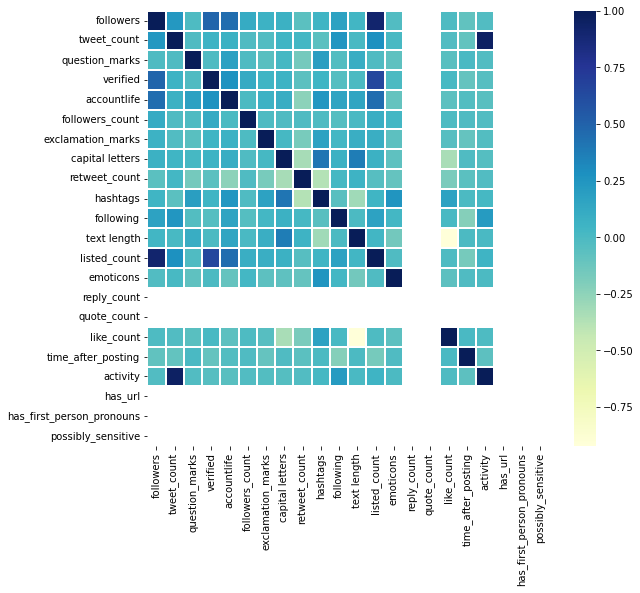

In [7]:
import seaborn as sns

corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)